This file contains the following parts (Sections)

Training
1.   Data preprocessing helping functions
2.   Loading Training Dataset for **Naive Bayes** and **Binary Naive bayes with Stopwords** and **Binary Naive bayes without Stopwords**
3.   **Naive Bayes Classifier**
4.   **Binary Naive Bayes Classifier with stopwords**
5.   **Binary Naive Bayes Classifier without stopwords**

Testing
1. Loading Test Dataset for **Naive Bayes**, **Binary Naive bayes with Stopwords** and **Binary Naive bayes without Stopwords**
2. Testing the working of Models
3. **Classification Report**
4. **Results**





In [ ]:
import glob
import math
import re
import spacy
from collections import Counter
from sklearn.metrics import classification_report
unlp = spacy.blank('ur')

## Data preprocessing helping functions

In [ ]:
def removePunctuation(word):
        word = word.text
        word = word.replace('\\r\\/','')
        word = word.replace(',','')
        word = word.replace('?','')
        word = word.replace('\n','')
        word = word.replace('\\n','')
        word = word.replace('٪','')
        word = word.replace('،','')
        word = word.replace('؟','')
        word = word.replace('!','')
        word = word.replace('ء','')
        word = word.replace('“','')
        word = word.replace('\\n\\/','')
        word = word.replace('۔','')
        word = word.replace('.','')
        word = word.replace(':','')
        word = word.replace('(','')
        word = word.replace(')','')
        word = word.replace('‘','')
        word = word.replace('’','')
        word = word.replace(' ','')
        word = word.replace('\ufeff','')
        return word

In [ ]:
def remove_duplicate_words(string):
        x = string.split()
        x = sorted(set(x), key = x.index)
        return ' '.join(x)

In [ ]:
#convertion of text into words
def words(text): 
  return re.findall(r'\w+', text)

## Loading Training Dataset for **Naive Bayes** and **Binary Naive bayes with Stopwords**



**1.   Fake news**



In [ ]:
FakeNews_list = []

for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Train/Fake/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()
      sentence = unlp(i)
      news =  ''
      for word in sentence:

        #remove punctuation
        word = removePunctuation(word)
        news += word + ' '
       
      FakeNews_list.append(news) 
    f.close()


In [ ]:
FakeNews_list

[' عمران خان نے وزارتِ عظمیٰ کا عہدہ سنبھالنے کے بعد سعودی عرب قرضے مانگنے سعودی عرب کے دارالحکومت ریاض روانہ ہو گئے اس سرکاری دورے میں سعودی عرب کی حکومت سے پاکستان کو معاشی بحران سے نکالنے کی درخواست کریں گے اس بحران سے نمٹنے کے لیے حکومت پاکستان ایک سال کے لیے 20 ارب ڈالر مالی اداد دینے کی درخواست کرے گی جس کی سر برایہ خود وزیر اعظم پاکستان عمران خان کر رہے ہیں دفترِ خارجہ کی جانب سے منگل کی شب جاری ہونے والے اعلامیے میں بتایا گیا ہے کہ سعودی حکام نے فیصلہ کیا ہے کہ وہ وزیر اعظم عمران خان کی درخواست پر 10 ارب ڈالر بطور مالہ امداد دینے پر اتفاق کیا ہے  عمران خان سعودی عرب میں سرمایہ کاری کے حوالے سے کشکول لیے مالی معاونت کی غرض سے ریاض میں موجود ہیں عمران خان کو خود تو اپنی عزت کا احساس نہیں مگر انھیں غیور پاکستانی قوم کی غیرت کا بھی زرا خیال نہ آیا اور سوچے سمجھے بغیر وہ سعودی عرب روانہ ہو گئے جس پر سعودی حکام کو ترس آگیا اور انھوں نے پاکستان کو نہ صرف ایک سال کے لیے 10 ارب ڈالر دینے کا اعلان کیا بلکہ 5 سال تک مؤخر ادائیگیوں پر تقریباً 15 ارب ڈالر مالیت تک کا تیل دینے پر بھی رضامند 


**2.   Real news**



In [ ]:
RealNews_list = []

for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Train/Real/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()
      sentence = unlp(i)
      news =  ''
      for word in sentence:

        #remove punctuation
        word = removePunctuation(word)
        news += word + ' '
       
      RealNews_list.append(news)  
    f.close()


In [ ]:
RealNews_list

['پاکستان کے وزیراعظم عمران خان سعودی عرب کے دارالحکومت ریاض میں ملک میں سرمایہ کاری کے حوالے سے سالانہ کانفرنس میں شرکت کر رہے ہیں حکومت پاکستان کا کہنا ہے کہ سعودی عرب نے پاکستان کو معاشی بحران سے نمٹنے میں مدد کے لیے ایک سال کے لیے تین ارب ڈالر دینے پر اتفاق کیا ہے دفترِ خارجہ کی جانب سے منگل کی شب جاری ہونے والے اعلامیے میں بتایا گیا ہے کہ یہ فیصلہ وزیر اعظم عمران خان کی سعودی قیادت سے ملاقات کے بعد کیا گیا  عمران خان سعودی عرب میں سرمایہ کاری کے حوالے سے سالانہ کانفرنس میں شرکت کے لیے ریاض میں موجود ہیں  اعلامیے کے مطابق سعودی عرب پاکستان کو نہ صرف ایک سال کے لیے تین ارب ڈالر دے گا بلکہ تین سال تک مؤخر ادائیگیوں پر تقریباً نو ارب ڈالر مالیت تک کا تیل دینے پر بھی رضامند ہو گیا ہے دفترِ خارجہ کا کہنا ہے کہ سعودی عرب کی جانب سے دیے جانے والے تین ارب ڈالر ادائیگیوں میں توازن لانے میں مدد دیں گے وزیراعظم ہاؤس کا کہنا ہے کہ سعودی عرب نے پاکستان میں آئل ریفائنری پراجیکٹ میں بھی دلچسپی کی تصدیق کی ہے اس کے علاوہ اعلامیہ میں بتایا گیا کہ سعودی حکومت بلوچستان میں معدنیات کی کانوں میں بھی دل

**Merging Fake and Real news**

In [ ]:
AllNews_list =  FakeNews_list + RealNews_list

In [ ]:
print(len(FakeNews_list))
print(len(RealNews_list))
print(len(AllNews_list))

288
350
638


**Counting words in combined set of Fake and Real news after removing duplicates (V)**



In [ ]:
#Converting complete list of news into a single string

Allnews = ''
for news in AllNews_list:
  Allnews += news

In [ ]:
#counting words after removing duplicate words from the news string
vocab = list(unlp(remove_duplicate_words(Allnews)))
V = len(vocab)
V

14235

**Calculation of prior[c] where c = [real, fake]**

In [ ]:
# Fake and real news count
fake_NewsCount = len(FakeNews_list)
real_NewsCount = len(RealNews_list)
N = fake_NewsCount + real_NewsCount

print(fake_NewsCount)
print(real_NewsCount)
N

288
350


638

In [ ]:
prior = {}
prior['real'] = real_NewsCount/N
prior['fake'] = fake_NewsCount/N
prior

{'fake': 0.45141065830721006, 'real': 0.54858934169279}

# **Naive Bayes classifer**


*   Counting words in Fake and Real news seperately **Without** removing duplicates **(Nw)**







In [ ]:
#Fake news
Fakenews = ''
for news in FakeNews_list:
  Fakenews += news

Fakenews_vocab_count = len(unlp(Fakenews))
Fakenews_vocab_count

88102

In [ ]:
#Real news
Realnews = ''
for news in RealNews_list:
  Realnews += news

Realnews_vocab_count = len(unlp(Realnews))
Realnews_vocab_count

131303



*   Calculating number of occurances of each word in fake and real news list **Without** removing duplicates from each news **(Ni)**



In [ ]:
#Fake news
Fakenews_Ni = ''
for news in FakeNews_list:
  Fakenews_Ni += news

Fakenews_Ni = Counter(words(Fakenews_Ni))
Fakenews_Ni

Counter({'عمران': 23,
         'خان': 133,
         'نے': 1192,
         'وزارت': 13,
         'عظمی': 1,
         'کا': 1509,
         'عہدہ': 3,
         'سنبھالنے': 2,
         'کے': 3381,
         'بعد': 231,
         'سعودی': 51,
         'عرب': 43,
         'قرضے': 3,
         'مانگنے': 1,
         'دارالحکومت': 6,
         'ریاض': 10,
         'روانہ': 7,
         'ہو': 378,
         'گئے': 145,
         'اس': 1090,
         'سرکاری': 6,
         'دورے': 9,
         'میں': 2744,
         'کی': 2565,
         'حکومت': 64,
         'سے': 1915,
         'پاکستان': 435,
         'کو': 1288,
         'معاشی': 14,
         'بحران': 5,
         'نکالنے': 8,
         'درخواست': 14,
         'کریں': 78,
         'گے': 135,
         'نمٹنے': 4,
         'لیے': 440,
         'ایک': 484,
         'سال': 150,
         '20': 30,
         'ارب': 40,
         'ڈالر': 51,
         'مالی': 20,
         'اداد': 1,
         'دینے': 55,
         'کرے': 50,
         'گی': 132,
         'جس': 339,
   

In [ ]:
#Real news
Realnews_Ni = ''
for news in RealNews_list:
  Realnews_Ni += news

Realnews_Ni = Counter(words(Realnews_Ni))
Realnews_Ni

Counter({'پاکستان': 484,
         'کے': 5221,
         'وزیراعظم': 22,
         'عمران': 34,
         'خان': 112,
         'سعودی': 83,
         'عرب': 84,
         'دارالحکومت': 5,
         'ریاض': 14,
         'میں': 4226,
         'ملک': 131,
         'سرمایہ': 61,
         'کاری': 52,
         'حوالے': 89,
         'سے': 2660,
         'سالانہ': 15,
         'کانفرنس': 13,
         'شرکت': 30,
         'کر': 667,
         'رہے': 242,
         'ہیں': 1429,
         'حکومت': 133,
         'کا': 2053,
         'کہنا': 234,
         'ہے': 3174,
         'کہ': 1626,
         'نے': 1818,
         'کو': 1785,
         'معاشی': 27,
         'بحران': 28,
         'نمٹنے': 7,
         'مدد': 68,
         'لیے': 551,
         'ایک': 751,
         'سال': 241,
         'تین': 89,
         'ارب': 102,
         'ڈالر': 179,
         'دینے': 55,
         'پر': 1337,
         'اتفاق': 5,
         'کیا': 780,
         'دفتر': 8,
         'خارجہ': 15,
         'کی': 3776,
         'جانب': 210,
      

**Calculating Conditional probability of each word present in Vocabulary with simple Naive Bayes clasifier**


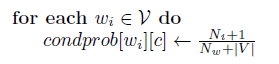 using this equation

In [ ]:
Fake_condProb_NB = {}
Real_condProb_NB = {}

for word in vocab:
  word = str(word)

  prob_f = (Fakenews_Ni[word] + 1)/(Fakenews_vocab_count + V)
  Fake_condProb_NB[word] = prob_f

  prob_r = (Realnews_Ni[word] + 1)/(Realnews_vocab_count + V)
  Real_condProb_NB[word] = prob_r
  

In [ ]:
print(Fake_condProb_NB['عمران'])
print(Real_condProb_NB['عمران'])

0.00023451928432531734
0.00024048702057194685


# **Boolean Naive Bayes classifer with stop words**


*  Counting words in Fake and Real news seperately **After** removing duplicates **(Nw)**



In [ ]:
#Fake news
Fakenews = ''
for news in FakeNews_list:
  Fakenews += remove_duplicate_words(news)

Fakenews_vocab_count = len(unlp(Fakenews))
Fakenews_vocab_count

43707

In [ ]:
#Real news
Realnews = ''
for news in RealNews_list:
  Realnews += remove_duplicate_words(news)

Realnews_vocab_count = len(unlp(Realnews))
Realnews_vocab_count

60182


*   Calculating number of occurances of each word in fake and real news list **After** removing duplicates from each news **(Ni)**






In [ ]:
#Real news
Fakenews_Ni = ''
for news in FakeNews_list:
  Fakenews_Ni += remove_duplicate_words(news)

Fakenews_Ni = Counter(words(Fakenews_Ni))
Fakenews_Ni

Counter({'عمران': 10,
         'خان': 40,
         'نے': 272,
         'وزارت': 9,
         'عظمی': 1,
         'کا': 279,
         'عہدہ': 3,
         'سنبھالنے': 2,
         'کے': 289,
         'بعد': 138,
         'سعودی': 6,
         'عرب': 10,
         'قرضے': 3,
         'مانگنے': 1,
         'دارالحکومت': 5,
         'ریاض': 2,
         'روانہ': 5,
         'ہو': 159,
         'گئے': 92,
         'اس': 245,
         'سرکاری': 6,
         'دورے': 6,
         'میں': 285,
         'کی': 286,
         'حکومت': 30,
         'سے': 282,
         'پاکستان': 86,
         'کو': 258,
         'معاشی': 13,
         'بحران': 3,
         'نکالنے': 7,
         'درخواست': 9,
         'کریں': 47,
         'گے': 67,
         'نمٹنے': 3,
         'لیے': 186,
         'ایک': 203,
         'سال': 91,
         '20': 23,
         'ارب': 19,
         'ڈالر': 23,
         'مالی': 11,
         'اداد': 1,
         'دینے': 40,
         'کرے': 29,
         'گی': 70,
         'جس': 187,
         'سر': 18,
  

In [ ]:
#Fake news
Realnews_Ni = ''
for news in RealNews_list:
  Realnews_Ni += remove_duplicate_words(news)

Realnews_Ni = Counter(words(Realnews_Ni))
Realnews_Ni

Counter({'پاکستان': 94,
         'کے': 350,
         'وزیراعظم': 11,
         'عمران': 15,
         'خان': 44,
         'سعودی': 13,
         'عرب': 23,
         'دارالحکومت': 5,
         'ریاض': 5,
         'میں': 349,
         'ملک': 65,
         'سرمایہ': 20,
         'کاری': 23,
         'حوالے': 64,
         'سے': 346,
         'سالانہ': 13,
         'کانفرنس': 7,
         'شرکت': 21,
         'کر': 219,
         'رہے': 149,
         'ہیں': 283,
         'حکومت': 43,
         'کا': 330,
         'کہنا': 109,
         'ہے': 331,
         'کہ': 302,
         'نے': 337,
         'کو': 320,
         'معاشی': 13,
         'بحران': 14,
         'نمٹنے': 5,
         'مدد': 44,
         'لیے': 196,
         'ایک': 262,
         'سال': 123,
         'تین': 59,
         'ارب': 39,
         'ڈالر': 49,
         'دینے': 45,
         'پر': 307,
         'اتفاق': 4,
         'کیا': 258,
         'دفتر': 7,
         'خارجہ': 12,
         'کی': 347,
         'جانب': 127,
         'منگل': 6,
     

**Calculating Conditional probability of each word present in Vocabulary**

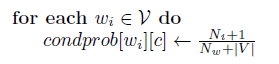 using this equation

In [ ]:
Fake_condProb_with_SW = {}
Real_condProb_with_SW = {}

for word in vocab:
  word = str(word)

  prob_f = (Fakenews_Ni[word] + 1)/(Fakenews_vocab_count + V)
  Fake_condProb_with_SW[word] = prob_f

  prob_r = (Realnews_Ni[word] + 1)/(Realnews_vocab_count + V)
  Real_condProb_with_SW[word] = prob_r
  

In [ ]:
print(Fake_condProb_with_SW['عمران'])
print(Real_condProb_with_SW['عمران'])

0.00018984501743122433
0.00021500463603746456


# **Boolean Naive Bayes Clasifier without stop words**

Loading Stop words to remove them from the real and fake news for training and testing

In [ ]:
with open('/content/drive/MyDrive/dataset_NLP_A5/stopwords-ur.txt', 'r') as f:
  stop_words = f.read()

In [ ]:
stop_words

'آئی\nآئے\nآج\nآخر\nآخرکبر\nآدهی\nآًب\nآٹھ\nآیب\nاة\nاخبزت\nاختتبم\nادھر\nارد\nاردگرد\nارکبى\nاش\nاضتعوبل\nاضتعوبلات\nاضطرذ\nاضکب\nاضکی\nاضکے\nاطراف\nاغیب\nافراد\nالگ\nاور\nاوًچب\nاوًچبئی\nاوًچی\nاوًچے\nاى\nاً\nاًذر\nاًہیں\nاٹھبًب\nاپٌب\nاپٌے\nاچھب\nاچھی\nاچھے\nاکثر\nاکٹھب\nاکٹھی\nاکٹھے\nاکیلا\nاکیلی\nاکیلے\nاگرچہ\nاہن\nایطے\nایک\nب\nت\nتبزٍ\nتت\nتر\nترتیت\nتریي\nتعذاد\nتن\nتو\nتوبم\nتوہی\nتوہیں\nتٌہب\nتک\nتھب\nتھوڑا\nتھوڑی\nتھوڑے\nتھی\nتھے\nتیي\nثب\nثبئیں\nثبترتیت\nثبری\nثبرے\nثبعث\nثبلا\nثبلترتیت\nثبہر\nثدبئے\nثرآں\nثراں\nثرش\nثعذ\nثغیر\nثلٌذ\nثلٌذوثبلا\nثلکہ\nثي\nثٌب\nثٌبرہب\nثٌبرہی\nثٌبرہے\nثٌبًب\nثٌذ\nثٌذکرو\nثٌذکرًب\nثٌذی\nثڑا\nثڑوں\nثڑی\nثڑے\nثھر\nثھرا\nثھراہوا\nثھرپور\nثھی\nثہت\nثہتر\nثہتری\nثہتریي\nثیچ\nج\nخب\nخبرہب\nخبرہی\nخبرہے\nخبهوظ\nخبًب\nخبًتب\nخبًتی\nخبًتے\nخبًٌب\nخت\nختن\nخجکہ\nخص\nخططرذ\nخلذی\nخو\nخواى\nخوًہی\nخوکہ\nخٌبة\nخگہ\nخگہوں\nخگہیں\nخیطب\nخیطبکہ\nدر\nدرخبت\nدرخہ\nدرخے\nدرزقیقت\nدرضت\nدش\nدفعہ\nدلچطپ\nدلچطپی\nدلچطپیبں\nدو\nدور\nدوراى\nدوضرا\nدوضروں\nدوضری\nدوضر

## Loading Training Dataset with the removal of stop words



1.   **Fake News**



In [ ]:
FakeNews_list = []

for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Train/Fake/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        #remove punctuation
        word = removePunctuation(word)
        
        #remove stop words
        if word not in stop_words:
          news += word + ' '
       
      FakeNews_list.append(news) 
    f.close()

In [ ]:
FakeNews_list



2.   **Real News**



In [ ]:
RealNews_list = []

for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Train/Real/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:

        #remove punctuation
        word = removePunctuation(word)

        #remove stop words
        if word not in stop_words:
          news += word + ' '
       
      RealNews_list.append(news)  
    f.close()

In [ ]:
RealNews_list

**Merging Fake and Real news**

In [ ]:
AllNews_list =  FakeNews_list + RealNews_list

Counting words in combined set of Fake and Real news **After** removing duplicates **(V)**

In [ ]:
#Converting complete list of news into a single string
Allnews = ''
for news in AllNews_list:
  Allnews += news

In [ ]:
#counting words after removing duplicate words from the news string
vocab = list(unlp(remove_duplicate_words(Allnews)))
V = len(vocab)
V

13900




*   Counting words in Fake and Real news seperately **After** removing duplicates **(Nw)**



In [ ]:
Fakenews = ''
for news in FakeNews_list:
  Fakenews += remove_duplicate_words(news)

Fakenews_vocab_count = len(unlp(Fakenews))
Fakenews_vocab_count

36046

In [ ]:
Realnews = ''
for news in RealNews_list:
  Realnews += remove_duplicate_words(news)

Realnews_vocab_count = len(unlp(Realnews))
Realnews_vocab_count

50100


*   Calculating number of occurances of each word in fake and real news list **After** removing duplicates from each news **(Ni)**


In [ ]:
#Fake news
Fakenews_Ni = ''
for news in FakeNews_list:
  Fakenews_Ni += remove_duplicate_words(news)

Fakenews_Ni = Counter(words(Fakenews_Ni))
Fakenews_Ni

Counter({'عمران': 10,
         'خان': 40,
         'نے': 272,
         'وزارت': 9,
         'عظمی': 1,
         'کا': 279,
         'عہدہ': 3,
         'سنبھالنے': 2,
         'بعد': 138,
         'سعودی': 6,
         'عرب': 10,
         'قرضے': 3,
         'مانگنے': 1,
         'دارالحکومت': 5,
         'ریاض': 2,
         'روانہ': 5,
         'اس': 245,
         'سرکاری': 6,
         'دورے': 6,
         'میں': 285,
         'حکومت': 30,
         'سے': 282,
         'پاکستان': 86,
         'معاشی': 13,
         'بحران': 3,
         'نکالنے': 7,
         'درخواست': 9,
         'نمٹنے': 3,
         'لیے': 186,
         'سال': 91,
         '20': 23,
         'ارب': 19,
         'ڈالر': 23,
         'مالی': 11,
         'اداد': 1,
         'دینے': 40,
         'جس': 187,
         'سر': 18,
         'برایہ': 1,
         'خود': 40,
         'وزیر': 15,
         'اعظم': 8,
         'دفتر': 3,
         'خارجہ': 7,
         'جانب': 76,
         'منگل': 3,
         'شب': 3,
         'جاری': 53,

In [ ]:
#Feal news
Realnews_Ni = ''
for news in RealNews_list:
  Realnews_Ni += remove_duplicate_words(news)

Realnews_Ni = Counter(words(Realnews_Ni))
Realnews_Ni

Counter({'پاکستان': 94,
         'وزیراعظم': 11,
         'عمران': 15,
         'خان': 44,
         'سعودی': 13,
         'عرب': 23,
         'دارالحکومت': 5,
         'ریاض': 5,
         'میں': 349,
         'ملک': 65,
         'سرمایہ': 20,
         'کاری': 23,
         'حوالے': 64,
         'سے': 346,
         'سالانہ': 13,
         'کانفرنس': 7,
         'شرکت': 21,
         'حکومت': 43,
         'کا': 330,
         'کہنا': 109,
         'نے': 337,
         'معاشی': 13,
         'بحران': 14,
         'نمٹنے': 5,
         'مدد': 44,
         'لیے': 196,
         'سال': 122,
         'تین': 59,
         'ارب': 39,
         'ڈالر': 49,
         'دینے': 44,
         'اتفاق': 4,
         'کیا': 258,
         'دفتر': 7,
         'خارجہ': 12,
         'جانب': 127,
         'منگل': 6,
         'شب': 3,
         'جاری': 80,
         'ہونے': 154,
         'اعلامیے': 3,
         'بتایا': 82,
         'گیا': 194,
         'فیصلہ': 41,
         'وزیر': 31,
         'اعظم': 15,
         'قیادت':

**Calculating Conditional probability of each word present in Vocabulary**

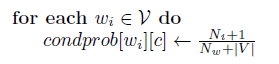 using this equation

In [ ]:
Fake_condProb_without_SW = {}
Real_condProb_without_SW = {}

for word in vocab:
  word = str(word)

  prob_fake = (Fakenews_Ni[word] + 1)/(Fakenews_vocab_count + V)
  Fake_condProb_without_SW[word] = prob_fake

  prob_real = (Realnews_Ni[word] + 1)/(Realnews_vocab_count + V)
  Real_condProb_without_SW[word] = prob_real
  

In [ ]:
print(Fake_condProb_without_SW['عمران'])
print(Real_condProb_without_SW['عمران'])

0.00022023785688543628
0.00025


# **Testing**

**Label assigned to each news**

NB = Naive Bayes

BNB = Binary Naive Bayes

SW = Stop words


In [ ]:
y_true_NB = []
y_true_BNB_without_SW = []
y_true_BNB_with_SW = []

**Loading Test set for Naive bayes Clasifier**

In [ ]:
#Fake news

News = []
for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Test/Fake/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        news += word + ' '
       
      News.append(news) 
      y_true_NB.append('fake')

    f.close()

#Real news
for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Test/Real/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()
      
      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        news += word + ' '
       
      News.append(news) 
      y_true_NB.append('real')

    f.close()

**Loading Test set for Binary Naive bayes Clasifier with Stop words**

In [ ]:
#Fake news

News = []
for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Test/Fake/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        news += word + ' '

      news = remove_duplicate_words(news) 
      News.append(news) 
      y_true_BNB_with_SW.append('fake')

    f.close()

#Real news
for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Test/Real/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()
      
      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        news += word + ' '

      news = remove_duplicate_words(news) 
      News.append(news) 
      y_true_BNB_with_SW.append('real')

    f.close()

**Loading Test set for Binary Naive bayes Clasifier without Stop words**

In [ ]:
#Fake news

News = []
for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Test/Fake/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        if word not in stop_words:
          news += word + ' '
       
      news = remove_duplicate_words(news)
      News.append(news) 
      y_true_BNB_without_SW.append('fake')

    f.close()

#Real news
for filename in sorted(glob.glob("/content/drive/MyDrive/dataset_NLP_A5/Test/Real/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()
      
      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        if word not in stop_words:
          news += word + ' '
       
      news = remove_duplicate_words(news)
      News.append(news) 
      y_true_BNB_without_SW.append('real')

    f.close()

**These functions will calculate the probabilty of each word in test news and return real or fake using argmax**



1.   **predict_NB** = Prediction of Real and Fake news with Naive Bayes Classifier
2.   **predict_BNB_without_SW** = Prediction of Real and Fake news with Binary Naive Bayes Classifier without Stopwords
3. **predict_BNB_with_SW** = Prediction of Real and Fake news with Binary Naive Bayes Classifier with Stopwords










In [ ]:
#Naive Bayes
def predict_NB(news):

  C = ['real','fake']
  score = {}
 
  for c in C:
    score[c] = math.log(prior[c])
    
    for word in news:
      if c == 'real':
        if word in Real_condProb_NB:
          score[c] += math.log(Real_condProb_NB[word])

      elif c == 'fake':
        if word in Fake_condProb_NB:
          score[c] += math.log(Fake_condProb_NB[word])

  result = max(score, key = score.get)
  y_pred_NB.append(result)

  if result == 'real':
    r['real'] += 1
  elif result == 'fake':
    r['fake'] += 1


In [ ]:
#Binary Naive Bayes without stopwords
def predict_BNB_without_SW(news):

  C = ['real','fake']
  score = {}
 
  for c in C:
    score[c] = math.log(prior[c])
    
    for word in news:
      if c == 'real':
        if word in Real_condProb_NB:
          score[c] += math.log(Real_condProb_without_SW[word])

      elif c == 'fake':
        if word in Fake_condProb_NB:
          score[c] += math.log(Fake_condProb_without_SW[word])

  result = max(score, key = score.get)
  y_pred_BNB_without_SW.append(result)

  if result == 'real':
    r['real'] += 1
  elif result == 'fake':
    r['fake'] += 1

In [ ]:
#Binary Naive bayes with stop words
def predict_BNB_with_SW(news):

  C = ['real','fake']
  score = {}
 
  for c in C:
    score[c] = math.log(prior[c])
    
    for word in news:
      if c == 'real':
        if word in Real_condProb_NB:
          score[c] += math.log(Real_condProb_with_SW[word])

      elif c == 'fake':
        if word in Fake_condProb_NB:
          score[c] += math.log(Fake_condProb_with_SW[word])

  result = max(score, key = score.get)
  y_pred_BNB_with_SW.append(result)

  if result == 'real':
    r['real'] += 1
  elif result == 'fake':
    r['fake'] += 1

## **Testing the final working of the Model**


1.   **Naive Bayes**



In [ ]:
y_pred_NB = []

r = {'real':0, 'fake':0}

for news in News:
  sentence = unlp(news)
  news = []
  for word in sentence:
    word = removePunctuation(word)
    news.append(word)

  predict_NB(news)

r

{'fake': 123, 'real': 139}


2.   **Binary Naive Bayes without Stopwords**



In [ ]:
y_pred_BNB_without_SW = []

r = {'real':0, 'fake':0}

for news in News:
  sentence = unlp(news)
  news = []
  for word in sentence:
    word = removePunctuation(word)
    news.append(word)

  predict_BNB_without_SW(news)

r

{'fake': 105, 'real': 157}




3.   **Binary Naive Bayes with Stopwords**



In [ ]:
y_pred_BNB_with_SW = []

r = {'real':0, 'fake':0}

for news in News:
  sentence = unlp(news)
  news = []
  for word in sentence:
    word = removePunctuation(word)
    news.append(word)

  predict_BNB_with_SW(news)

r

{'fake': 107, 'real': 155}

# **Classification Report**

In [ ]:
target_names = ['real', 'fake']

1. Classification report for **Naive Bayes**

In [ ]:
print(classification_report(y_true_NB, y_pred_NB, target_names=target_names))

              precision    recall  f1-score   support

        real       0.64      0.71      0.67       112
        fake       0.76      0.71      0.73       150

    accuracy                           0.71       262
   macro avg       0.70      0.71      0.70       262
weighted avg       0.71      0.71      0.71       262



1. Classification report for **Binary Naive Bayes without Stopwords**

In [ ]:
print(classification_report(y_true_BNB_without_SW, y_pred_BNB_without_SW, target_names=target_names))

              precision    recall  f1-score   support

        real       0.73      0.69      0.71       112
        fake       0.78      0.81      0.79       150

    accuracy                           0.76       262
   macro avg       0.76      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262



1. Classification report for **Binary Naive Bayes with Stopwords**

In [ ]:
print(classification_report(y_true_BNB_with_SW, y_pred_BNB_with_SW, target_names=target_names))

              precision    recall  f1-score   support

        real       0.75      0.71      0.73       112
        fake       0.79      0.82      0.81       150

    accuracy                           0.77       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.77      0.77      0.77       262



**Results**

We can clearly see that Boolean Naive Bayes improves our performance as compared to simple Naive Bayes Classifier



1.   Naive Bayes = 75%
2.   Binary Naive Bayes with stopwords = 76%
3. Binary Naive Bayes without stopwords = 77%

